In [268]:
import os, sys, numpy as np, pandas as pd, matplotlib.pyplot as plt, math
import lab_helper as lh

In [269]:
T_lab_C   = 22.0            # °C
L_scin_cm = 9.0             # см
L_ion_cm  = (10.0 - 0.5)/2  # см
P_atm     = 727

In [270]:
P_scin = P_atm - np.array([720.0,  710.0,  700.0,  690.0,  680.0,  670.0,  660.0,  650.0,  640.0,  630.0,  620.0,  610.0,  600.0,  590.0,  580.0,  570.0,  560.0,  550.0,  540.0],  dtype=float)
print(P_scin)

N_scin = np.array([3095.0, 2982.0, 2851.0, 2570.0, 4850.0, 4788.0, 4275.0, 3916.0, 3323.0, 3055.0, 2808.0, 3664.0, 3167.0, 2551.0, 2902.0, 2887.0, 2819.0, 2799.0, 2849.0], dtype=float)
t_scin = np.array([10.0,   10.0,   10.0,   10.0,   20.0,   20.0,   20.0,   20.0,   20.0,   20.0,   20.0,   30.0,   30.0,   30.0,   40.0,   50.0,   60.0,   80.0,   100.0],  dtype=float)

P_ion  = P_atm - np.array([695.0, 675.0, 660.0, 650.0, 640.0, 620.0, 605.0, 580.0, 560.0, 550.0, 530.0, 510.0, 490.0, 470.0, 445.0, 430.0, 410.0, 390.0, 370.0, 350.0, 330.0, 310.0, 290.0, 280.0, 260.0, 240.0, 220.0, 200.0, 180.0, 160.0, 140.0, 120.0, 100.0, 80.0, 60.0, 210.0, 190.0, 170.0, 150.0, 130.0], dtype=float)


I_ion  = np.array([33.0,  61.0,  85.0,  96.0, 112.0, 138.0, 166.0, 196.0, 226.0, 242.0, 278.0, 310.0, 339.0, 372.0, 412.0, 439.0, 468.0, 511.0, 541.0, 577.0, 614.0, 649.0, 684.0, 702.0, 734.0, 762.0, 784.0, 802.0, 808.0, 810.0, 803.0, 794.0, 789.0, 790.0, 783.0, 801.0, 807.0, 811.0, 811.0, 805.0], dtype=float)

[  7.  17.  27.  37.  47.  57.  67.  77.  87.  97. 107. 117. 127. 137.
 147. 157. 167. 177. 187.]


In [271]:
def bring_to_NTP_length(L_cm, P_mmHg, T_C):
    T_K = 273.15 + T_C
    return L_cm * (P_mmHg/760.0) * (288.0/T_K)

def R_to_E_MeV(R_cm):
    return (np.asarray(R_cm)/0.32)**(2.0/3.0)

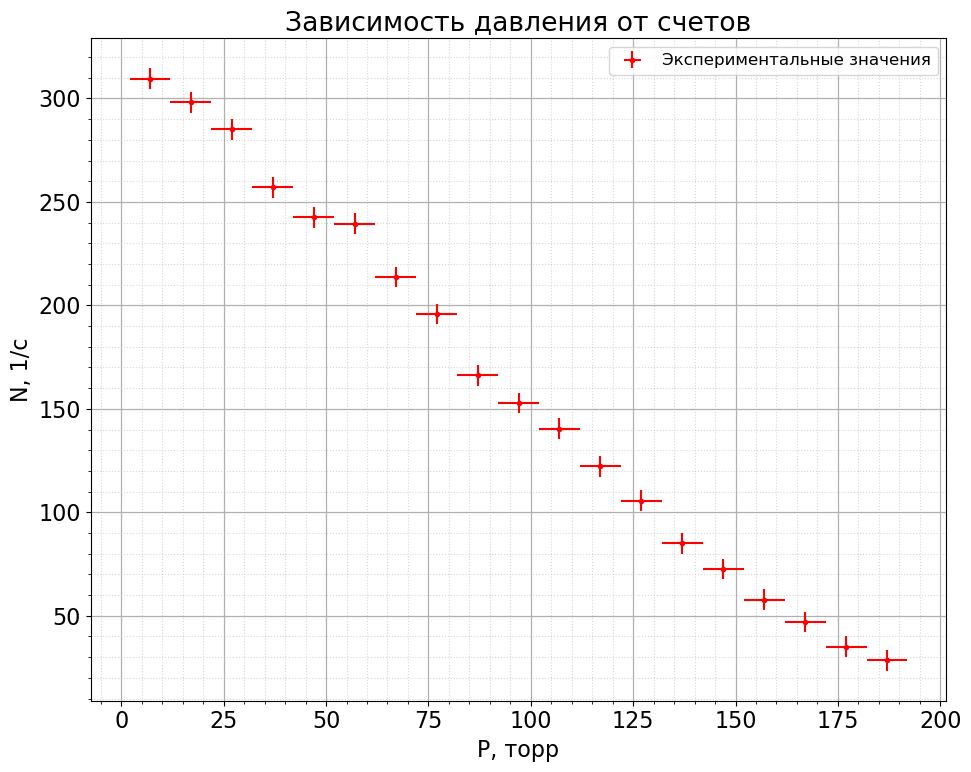

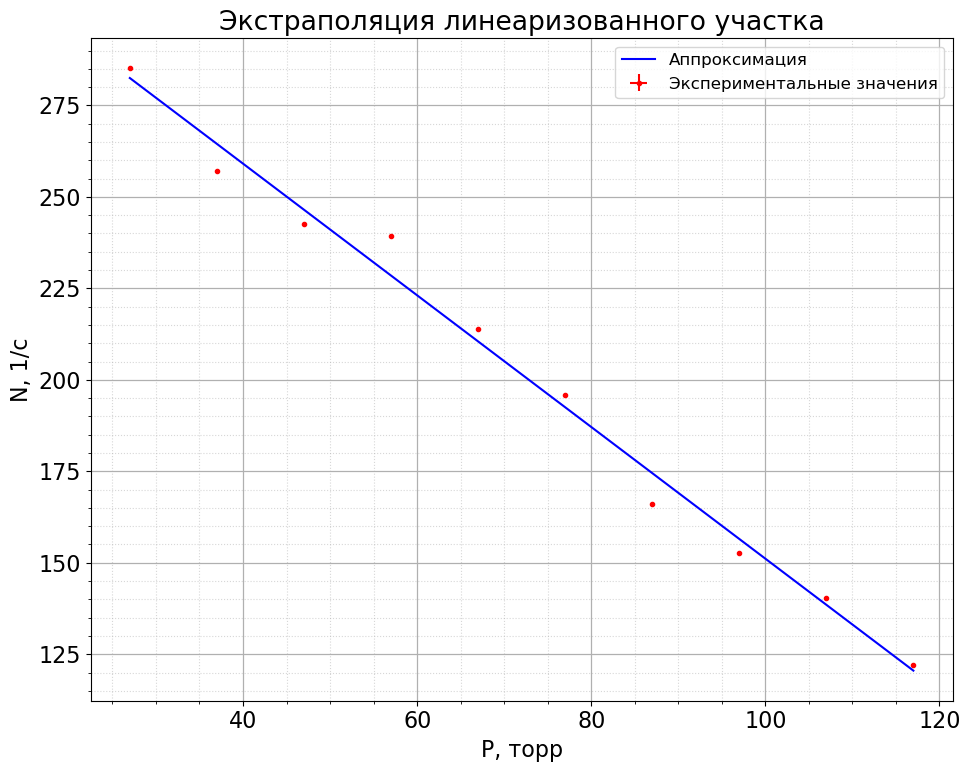

P0 = 183.96802336162128
σ(P0) = 7.594447356892071
σ(R) = 0.08775559059650424
σ(E) = 0.09725454259126078


(np.float64(183.96802336162128),
 np.float64(2.1257929355872682),
 3.5338435680673697,
 np.float64(2.5509515227047217))

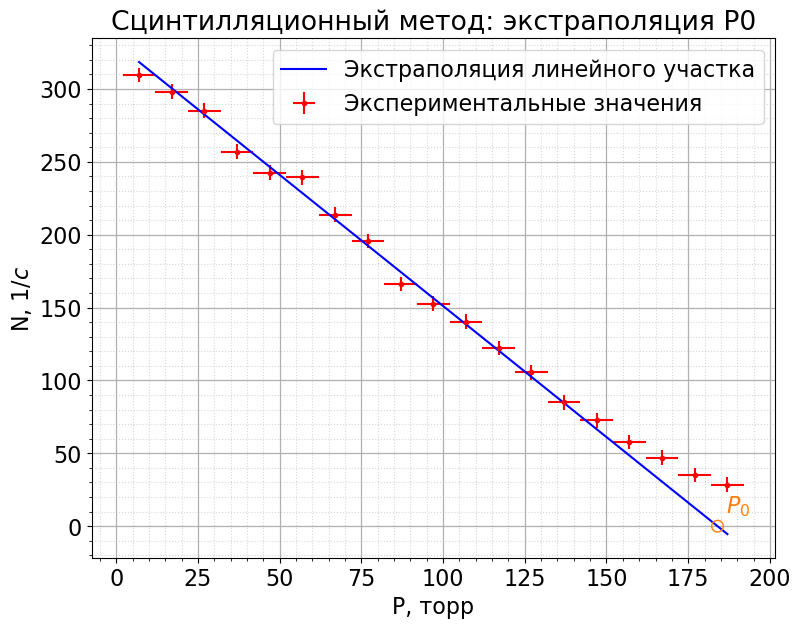

In [272]:
rate = N_scin / t_scin
lh.plot_data("scin", "Зависимость давления от счетов", "P, торр", "N, 1/с", P_scin, rate, 5, 5)

mask_s = (P_scin <= P_atm - 610) & (P_scin >= P_atm - 700)
(k_s, dk_s), (b_s, db_s) = lh.fit_linear_and_plot_data("scinc_extrapolation", "Экстраполяция линеаризованного участка", "P, торр", "N, 1/с", P_scin[mask_s], rate[mask_s], 0, 0)

P0_scin   = (-b_s) / k_s
R_scin_cm = bring_to_NTP_length(L_scin_cm, P0_scin, T_lab_C)
E_scin    = R_to_E_MeV(R_scin_cm)

xx = np.linspace(P_scin.min(), P_scin.max(), 500)
plt.figure(figsize = (8,6), facecolor = "white") # Создаем фигуру
plt.errorbar(P_scin, rate, xerr = 5, yerr = 5, fmt='.r', label = 'Экспериментальные значения')
plt.plot(xx, k_s*xx + b_s, label='Экстраполяция линейного участка', color='blue')

# NEW: вертикальная линия и маркер точки P0 (где фит пересекает ось Y в нуле)
plt.scatter([P0_scin], [0], s=70, facecolors='none', edgecolors='tab:orange', zorder=5)
plt.annotate(fr'$P_0$', xy=(P0_scin, 0), xytext=(6, 10),
             textcoords='offset points', color='tab:orange')

# NEW: чтобы точка (P0, 0) точно попала в видимую область
ymin, ymax = plt.ylim()
plt.ylim(min(ymin, 0), ymax)
plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')
plt.minorticks_on()
plt.tight_layout()
plt.xlabel('P, торр'); plt.ylabel(r'N, $1/с$')
plt.title('Сцинтилляционный метод: экстраполяция P0')
plt.legend()
plt.savefig('scint_extrapolation.png')


sigma_P0 = np.sqrt(
    (db_s / k_s)**2 +
    ((b_s * dk_s) / (k_s**2))**2
)

print("P0 =", P0_scin)
print("σ(P0) =", sigma_P0)

R_scin_cm = bring_to_NTP_length(L_scin_cm, P0_scin, T_lab_C)
E_scin    = R_to_E_MeV(R_scin_cm)

sigma_R = R_scin_cm * (sigma_P0 / P0_scin)
sigma_E = E_scin * (2/3) * (sigma_P0 / P0_scin)

print("σ(R) =", sigma_R)
print("σ(E) =", sigma_E)


P0_scin, R_scin_cm, float(E_scin), R_scin_cm * 1.2

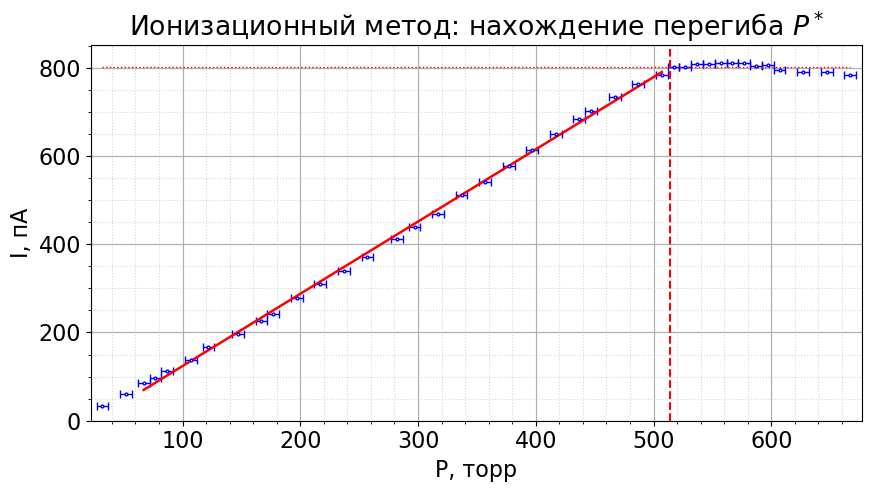

P* ≈ 513.8 торр, I_plateau ≈ 801.1 пА
3.7598833618945164
P* = 513.76 ± 4.75 мм рт. ст.
R(н.у.) = 3.133 ± 0.029 см
E = 4.577 ± 0.028 МэВ


In [273]:
mask_rise = (P_ion >= 60) & (P_ion <= 510)
x1, y1 = P_ion[mask_rise], I_ion[mask_rise]

# плато — среднее по правому «плоскому» хвосту
mask_plateau = (P_ion >= 520)
I_plateau = I_ion[mask_plateau].mean()

# --- линейный фит y = kx + b на восходящем участке ---
(k1, dk1), (b1, db1) = lh.fit_linear(x1, y1)

# точка пересечения прямой с уровнем плато: k1*P* + b1 = I_plateau
P_star = (I_plateau - b1) / k1
I_star = I_plateau

# линия фита
xx = np.linspace(x1.min(), x1.max(), 300)
yy = k1*xx + b1

# --- график ---
plt.figure(figsize=(9,5.2))
# синие точки с горизонтальными погрешностями
plt.errorbar(P_ion, I_ion, xerr=5, fmt='.', ms=4, mec='blue', mfc='white',
             ecolor='blue', elinewidth=1, capsize=3, label='I (P)')

# красная линия аппроксимации
plt.plot(xx, yy, 'r-', linewidth=1.8)

# пунктирная вертикаль в P*
plt.axvline(P_star, color='red', linestyle='--', linewidth=1.5)
# (опционально) тонкая красная линия уровня плато
plt.hlines(I_plateau, P_ion.min(), P_ion.max(), colors='red', linestyles=':', linewidth=1.0)
plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')
plt.minorticks_on()
plt.tight_layout()
plt.title(rf"Ионизационный метод: нахождение перегиба $P^*$")
plt.xlabel("P, торр")
plt.ylabel("I, пА")
plt.xlim(P_ion.min()-10, P_ion.max()+10)
plt.ylim(0, max(I_ion)*1.05)
plt.tight_layout()
plt.savefig('ion_example_style.png', dpi=160)
plt.show()

print(f"P* ≈ {P_star:.1f} торр, I_plateau ≈ {I_plateau:.1f} пА")

mask_plat = (P_ion >= 540)
x1, y1 = P_ion[mask_rise], I_ion[mask_rise]
I_pl_vals = I_ion[mask_plat]
I_pl = I_pl_vals.mean()
sigma_Ipl = I_pl_vals.std(ddof=1) / np.sqrt(len(I_pl_vals)) if len(I_pl_vals)>1 else 0.0
sigma_P = math.sqrt((sigma_Ipl/k1)**2 + (db1/k1)**2 + ((P_star/k1)*dk1)**2)
R_cm = bring_to_NTP_length(L_ion_cm, P_star, T_lab_C)
R = R_cm * 1.2
print(R)
E = R_to_E_MeV(R_cm)

# погрешности R и E (через σP*)
sigma_R = R_cm * (sigma_P / P_star)
sigma_E = E * (2/3) * (sigma_P / P_star)

print(f"P* = {P_star:.2f} ± {sigma_P:.2f} мм рт. ст.")
print(f"R(н.у.) = {R_cm:.3f} ± {sigma_R:.3f} см")
print(f"E = {E:.3f} ± {sigma_E:.3f} МэВ")
